In [ ]:
# Importing Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor 
import pickle


In [ ]:
# Load Dataset
df=pd.read_csv('zameen-updated.csv')

In [75]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [ ]:
# Remove URL from dataset
df.drop(['page_url'],inplace=True,axis=1)

In [77]:
df

,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,17355248,6754,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168442,17355249,680,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,8.0,5-10 Marla
168443,17355250,6757,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168444,17355251,6752,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,7.8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,7.8,5-10 Marla


In [78]:
df.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


In [ ]:
# Check total null values
df.isnull().sum()

property_id          0
location_id          0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64

In [ ]:
# Check datatype of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   property_type  168446 non-null  object 
 3   price          168446 non-null  int64  
 4   location       168446 non-null  object 
 5   city           168446 non-null  object 
 6   province_name  168446 non-null  object 
 7   latitude       168446 non-null  float64
 8   longitude      168446 non-null  float64
 9   baths          168446 non-null  int64  
 10  area           168446 non-null  object 
 11  purpose        168446 non-null  object 
 12  bedrooms       168446 non-null  int64  
 13  date_added     168446 non-null  object 
 14  agency         124375 non-null  object 
 15  agent          124374 non-null  object 
 16  Area Type      168446 non-null  object 
 17  Area Size      168446 non-nul

In [ ]:
# Drop diplicate value
df.drop_duplicates(inplace=True)

In [ ]:
# Drop missing values
df.dropna(inplace=True)

In [ ]:
# Check total null values
df.isnull().sum()

property_id      0
location_id      0
property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
area             0
purpose          0
bedrooms         0
date_added       0
agency           0
agent            0
Area Type        0
Area Size        0
Area Category    0
dtype: int64

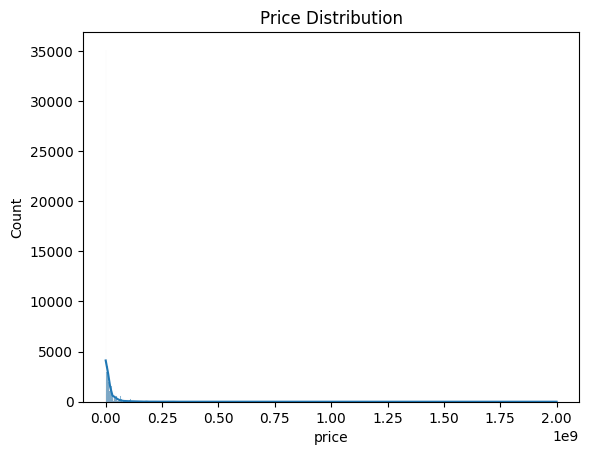

In [ ]:
# Check Price Dstribution
plt.title('Price Distribution')
sns.histplot(df['price'],kde=True)
plt.show()

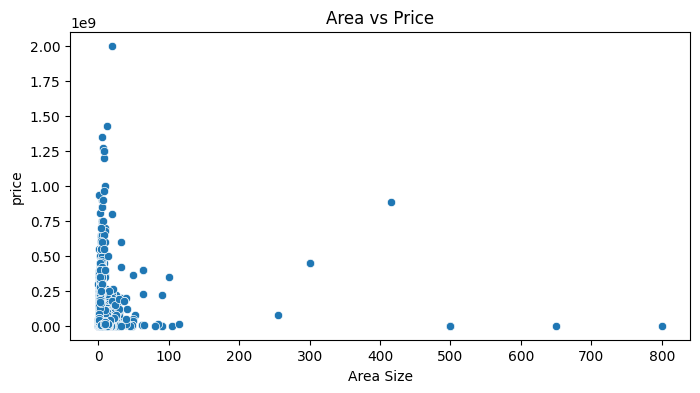

In [ ]:
# Check Area vs Price Distribution
plt.figure(figsize=(8,4))
plt.title('Area vs Price')
sns.scatterplot(x='Area Size',y='price', data=df)
plt.show()

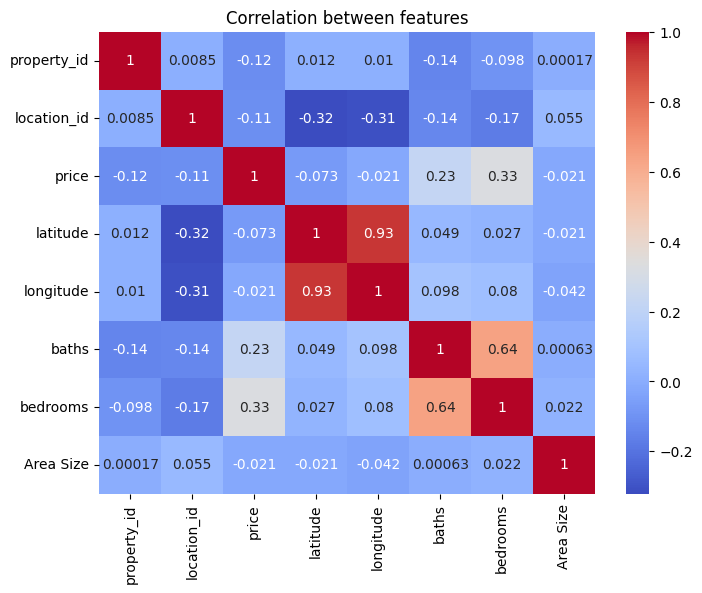

In [ ]:
# Check relation b/w price and area
plt.figure(figsize=(8,6))
plt.title('Correlation between features')
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

In [87]:
# Convert date_added to datetime
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')

In [ ]:
# Now create new features in dataset
df['price_per_marla']=df['price']/df['Area Size']

In [89]:
df['month_added']=df['date_added'].dt.month

In [90]:
df['is_DHA']=df['location'].apply(lambda x:1 if 'DHA' in x else 0)

In [ ]:
# Encode categorical variabal using label encoder
le=LabelEncoder()
df['location_encoded']=le.fit_transform(df['location'])

In [92]:
df

,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,...,date_added,agency,agent,Area Type,Area Size,Area Category,price_per_marla,month_added,is_DHA,location_encoded
4,841645,3226,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,...,2019-07-10,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla,8.750000e+05,7,1,252
7,1258636,3241,Flat,7800000,E-11,Islamabad,Islamabad Capital,33.698244,72.984238,2,...,2019-05-05,Ettemad Enterprises,Balqiaz Marwat,Marla,6.2,5-10 Marla,1.258065e+06,5,0,300
8,1402466,376,House,50000000,DHA Defence,Islamabad,Islamabad Capital,33.540894,73.095732,7,...,2018-10-19,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Kanal,1.0,1-5 Kanal,5.000000e+07,10,1,252
9,1418706,3282,Penthouse,40000000,F-11,Islamabad,Islamabad Capital,33.679211,72.988787,5,...,2019-06-27,Crown Associate,Abrar Ahmed,Kanal,1.0,1-5 Kanal,4.000000e+07,6,0,325
10,1425602,429,Flat,35000000,Diplomatic Enclave,Islamabad,Islamabad Capital,33.728873,73.119628,3,...,2019-06-03,Al Sahar Estate,Zahid H. Usmani,Marla,7.1,5-10 Marla,4.929577e+06,6,0,292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,17355248,6754,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,...,2019-07-18,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla,2.760417e+06,7,0,370
168442,17355249,680,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,...,2019-07-18,Al Shahab Enterprises,Shahmir,Marla,8.0,5-10 Marla,1.562500e+06,7,0,370
168443,17355250,6757,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,...,2019-07-18,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla,2.812500e+06,7,0,370
168444,17355251,6752,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,...,2019-07-18,Al Shahab Enterprises,Shahmir,Marla,7.8,5-10 Marla,1.410256e+06,7,0,370


In [ ]:
# Detect Outliers
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1
df=df[(df['price']>=Q1-1.5 * IQR) & (df['price']<=Q3+1.5 * IQR)]

# *Hyperparameter Tuning and Model Evaluation*

In [ ]:
# Drop irrelevant and non numeric columns
df_models=df.select_dtypes(include=[np.number]).drop(['price_per_marla'],axis=1)

In [ ]:
# Create x & y variable 
x=df_models.drop('price',axis=1)
y=df_models['price']

In [ ]:
# Split data in trian and test 
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=42,shuffle=True)

In [ ]:
# Used Random Forest Regression model for prediction
random_forest_reg=RandomForestRegressor()

In [ ]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(estimator=random_forest_reg, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [ ]:
# Predict R2 Score & evaluation
y_pred = grid.predict(X_test)
print("R2 Score:", r2_score(Y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, y_pred)))

R2 Score: 0.7181352209311862
RMSE: 6561284.98790975


# The below step used for Streamlite Deployment

In [ ]:
# Safe copy
df = df.copy()
# Add missing fields
df['floors'] = 1
df['garage'] = 0
df['year_built'] = 2000


In [ ]:
# Add missing columns
df['floors'] = 1
df['garage'] = 0
df['year_built'] = 2000

# Define features and target variable
features = ['Area Size', 'baths', 'bedrooms', 'is_DHA', 'floors', 'garage', 'year_built']
X = df[features]
Y = df['price']

# Split data in train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Training the model
model = RandomForestRegressor()
model.fit(X_train, Y_train)

# Save the training model and features
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)
with open("model_columns.pkl", "wb") as f:
    pickle.dump(X_train.columns.tolist(), f)

print("Model trained and saved with new features.")


Model trained and saved with new features.
